In [32]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
# jupyter notebook에서 matplotlib의 결과를 아래 바로 보이게 하기 위해 %matplotlib linline을 입력한다.
%matplotlib inline

In [4]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [5]:
# 데이터 확인
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


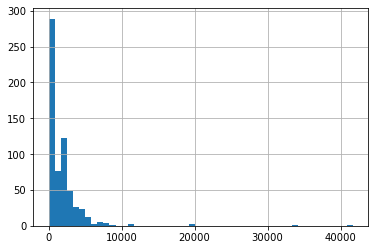

In [8]:
#ApplicationIncome을 histograme으로 표현
df['CoapplicantIncome'].hist(bins=50)

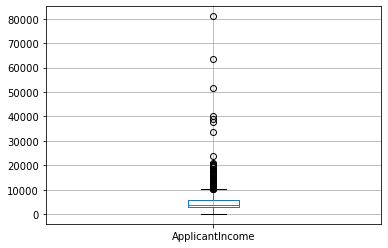

In [10]:
# ApplicationIncome의 분포를 확인하기 위해 boxplot으로 표현하면 아래 차트와 같음

# 차트에서 Outliters/extreme values가 많은 것을 볼 수 있음.
# 즉 사회에 income disparity가 있다.

df.boxplot(column="ApplicantIncome")

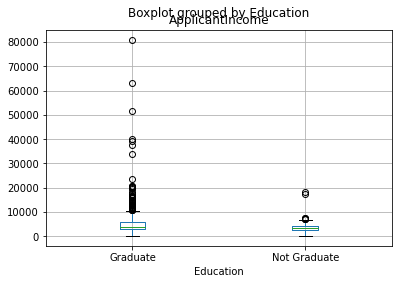

In [11]:
df.boxplot(column="ApplicantIncome", by="Education")

사회에 income disparity가 있다면 Education의 차이에 따라서 구분을 지면

Graduate의 수입 mean이 Not Graduate보다 높은것을 확인할 수 있음

또한, Graduate에서는 High incomes가 보이고, outlier로 나타난다.

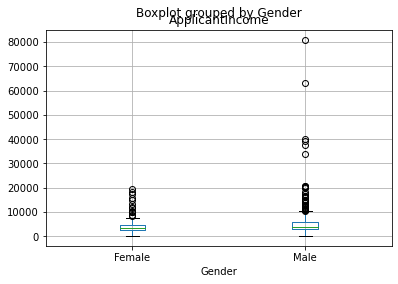

In [13]:
df.boxplot(column="ApplicantIncome", by="Gender")

Gender로 그룹을 나눈 상황을 나타낸 그래프이다.

Male이 Female보다 high Incomes가 많은 것을 확인할 수 있다.

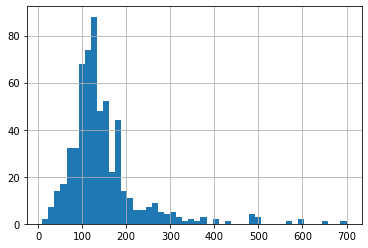

In [14]:
df['LoanAmount'].hist(bins=50)

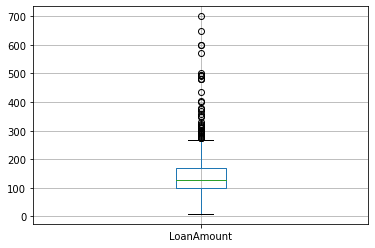

In [15]:
df.boxplot(column="LoanAmount")

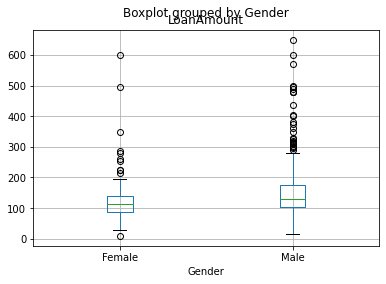

In [16]:
df.boxplot(column="LoanAmount", by="Gender")

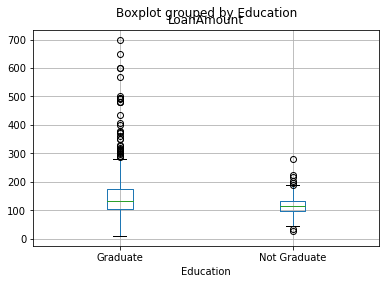

In [17]:
df.boxplot(column="LoanAmount", by="Education")

결론적으로 LoanAmount, ApplicantIncome은 extreme values를 가지고 있기 떄문에 data munging(데이터 전처리)이 필요하다.

## Categorical variable analysis

In [20]:
temp1 = df["Credit_History"].value_counts(ascending=True)
print('Frequency Table for Credit History:')
print(temp1)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


Credit_History에 따른 Loan_Status의 mean값을 계산

In [22]:
temp2 = df.pivot_table(values="Loan_Status", index=["Credit_History"], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

print('Probability of Getting loan for each Credit History class')
print(temp2)

Probability of Getting loan for each Credit History class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))

<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Applicants by Credit_History')

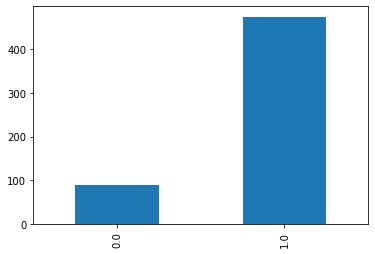

In [24]:
temp1.plot(kind="bar")
ax1=fig.add_subplot(121)
ax1.set_xlabel("Credit_History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Credit_History")

Text(0.5, 1.0, 'Probability of Getting Loan by Credit_History')

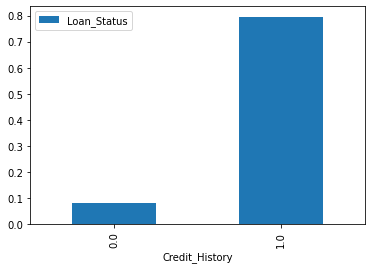

In [25]:
temp2.plot(kind="bar")
ax2 = fig.add_subplot(122)
ax2.set_xlabel("Credit_History")
ax2.set_ylabel("Probability of Getting Loan")
ax2.set_title('Probability of Getting Loan by Credit_History')

결과적으로 8배의 credit_history가 있는 경우 더 많은 Loan의 기회를 얻게된다.

In [26]:
temp3=pd.crosstab(df['Credit_History'], df['Loan_Status'])
print(temp3)

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


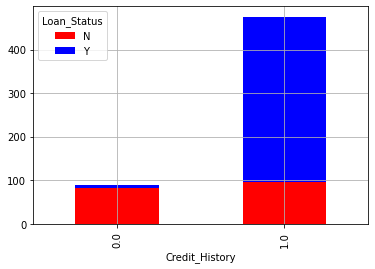

In [27]:
temp3.plot(kind="bar", stacked=True, color=['red', 'blue'], grid=True)

## Data Munging using Pandas

1. There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables

2. While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately

### 널값이나 Nan값 체크

In [28]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Null 값에 Mean값 채우기

In [29]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
df['Self_Employed'].fillna('No', inplace=True)

In [34]:
table = df.pivot_table(values="LoanAmount", index='Self_Employed', columns="Education", aggfunc=np.median)

def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]

# df['LoanAmount'].fillna(df[df['LoanAmount'].insull()].apply(fage, axis=1), inplace=True)

#### Extreme value 값들 처리하기

extreme value 값을 outliers로 처리하기 전에 log transformation
=> outliers 영향력을 무효화

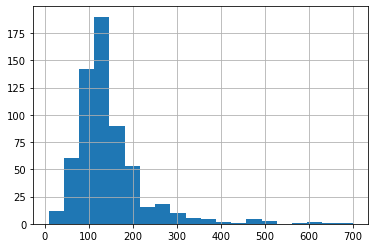

In [35]:
df['LoanAmount'].hist(bins=20)

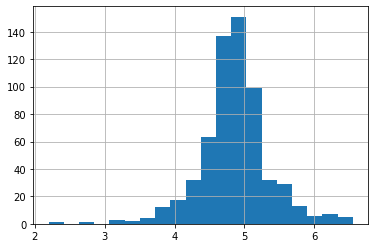

In [38]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

applicant가 낮은 income이 있지만 stroing co-applicants가 있을 것
따라서 두개를 합쳐서 np.log transformation하자

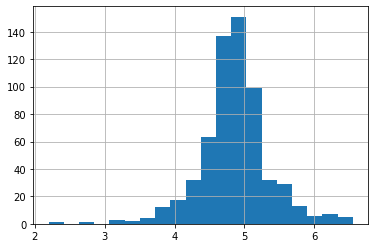

In [39]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)

### Building a Predictive Model in Python

scikit_learn을 통해 predictive model을 만들어보자

scikit_learn은 numerical data만 허용하기 때문에 categorical variables을 numeric하게 변경해줘야한다.

In [40]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    
df.dtypes

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']